# ABIYA SABITTA RAGADANI || 05111940000166
MID-TERM EXAM

# Recommendation System using FP-Growth

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
#Import Apache Spark SQL
from pyspark.sql import SparkSession

# Create Spark Session/Context
# We are using local machine with all the CPU cores [*]
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Hello Pyspark") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

## Read Dataset

In [3]:
import pandas as pd
data = pd.read_excel('market-basket.xlsx')
data.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom


## Select useful columns

In [4]:
df1 = data[['CustomerID','BillNo','Itemname']]
df1.head()

,CustomerID,BillNo,Itemname
0,17850.0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,17850.0,536365,WHITE METAL LANTERN
2,17850.0,536365,CREAM CUPID HEARTS COAT HANGER
3,17850.0,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,17850.0,536365,RED WOOLLY HOTTIE WHITE HEART.


## Group item name with the bill number

In [5]:
df=df1.groupby ('BillNo') ['Itemname']. apply (lambda x: x.reset_index (drop = True)). unstack (). reset_index ()
df.drop('BillNo',axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113
0,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,BOX OF VINTAGE ALPHABET BLOCKS,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BATH BUILDING BLOCK WORD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
items = (df[0].unique())
items

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'HAND WARMER UNION JACK',
       'ASSORTED COLOUR BIRD ORNAMENT', ...,
       'PAPER CRAFT , LITTLE BIRDIE', 'COCKLE SHELL DISH',
       'Adjust bad debt'], dtype=object)

## Encode Values

In [7]:
encoded_vals = []
def custom():
    for index, row in df.iterrows():
        labels = {}
        uncommons = list(set(items) - set(row))
        commons = list(set(items).intersection(row))
        for uc in uncommons:
            labels[uc] = 0
        for com in commons:
            labels[com] = 1
        encoded_vals.append(labels)
custom()
ohe_df = pd.DataFrame(encoded_vals)
print(ohe_df)

       WOOD AND GLASS MEDICINE CABINET  S/4 GROOVY CAT MAGNETS  BLUE FLY SWAT  \
0                                    0                       0              0   
1                                    0                       0              0   
2                                    0                       0              0   
3                                    0                       0              0   
4                                    0                       0              0   
...                                ...                     ...            ...   
21658                                0                       0              0   
21659                                0                       0              0   
21660                                0                       0              0   
21661                                0                       0              0   
21662                                0                       0              0   

       BIRTHDAY CARD, RETRO

## Find Support for the items

In [8]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

freq_items = apriori(ohe_df, min_support=0.006, use_colnames=True) #, verbose=1 #min_support=0.006, 
freq_items

,support,itemsets
0,0.012417,"(BIRTHDAY CARD, RETRO SPOT)"
1,0.011864,(SINGLE ANTIQUE ROSE HOOK IVORY)
2,0.013572,(REGENCY SUGAR BOWL GREEN)
3,0.028389,(DOORMAT UNION FLAG)
4,0.007801,(SET 12 COLOUR PENCILS LOVE LONDON)
...,...,...
13192,0.006416,"(nan, STRAWBERRY CHARLOTTE BAG, RED RETROSPOT ..."
13193,0.006370,"(nan, STRAWBERRY CHARLOTTE BAG, RED RETROSPOT ..."
13194,0.006093,"(nan, STRAWBERRY CHARLOTTE BAG, RED RETROSPOT ..."
13195,0.007294,"(nan, HERB MARKER BASIL, HERB MARKER MINT, HER..."


In [9]:
freq_items.to_excel('Export&Supportvalues.xlsx')

## Find the confidence of the rules

In [10]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.006)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(BIRTHDAY CARD, RETRO SPOT)",(DOTCOM POSTAGE),0.012417,0.032682,0.007109,0.572491,17.516760,6.703061e-03,2.262682
1,(DOTCOM POSTAGE),"(BIRTHDAY CARD, RETRO SPOT)",0.032682,0.012417,0.007109,0.217514,17.516760,6.703061e-03,1.262109
2,(nan),"(BIRTHDAY CARD, RETRO SPOT)",0.999954,0.012417,0.012371,0.012372,0.996329,-4.558845e-05,0.999954
3,"(BIRTHDAY CARD, RETRO SPOT)",(nan),0.012417,0.999954,0.012371,0.996283,0.996329,-4.558845e-05,0.012417
4,(nan),(SINGLE ANTIQUE ROSE HOOK IVORY),0.999954,0.011864,0.011864,0.011864,1.000046,5.476410e-07,1.000001
...,...,...,...,...,...,...,...,...,...
84153,(HERB MARKER BASIL),"(HERB MARKER ROSEMARY, nan, HERB MARKER MINT, ...",0.010894,0.007663,0.007155,0.656780,85.709746,7.071577e-03,2.891254
84154,(HERB MARKER MINT),"(HERB MARKER ROSEMARY, nan, HERB MARKER BASIL,...",0.010894,0.007524,0.007155,0.656780,87.287226,7.073086e-03,2.891657
84155,(HERB MARKER THYME),"(HERB MARKER ROSEMARY, nan, HERB MARKER BASIL,...",0.010756,0.007247,0.007155,0.665236,91.789864,7.077107e-03,2.965530
84156,(HERB MARKER CHIVES),"(HERB MARKER ROSEMARY, nan, HERB MARKER BASIL,...",0.009509,0.007801,0.007155,0.752427,96.448699,7.080872e-03,4.007704


## Display the confidence and support

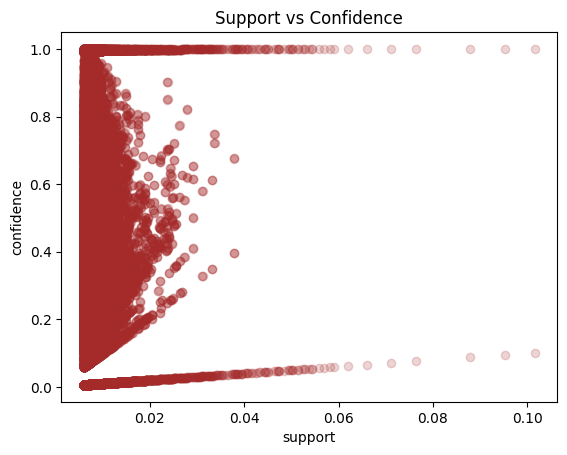

In [11]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.2,color='brown')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

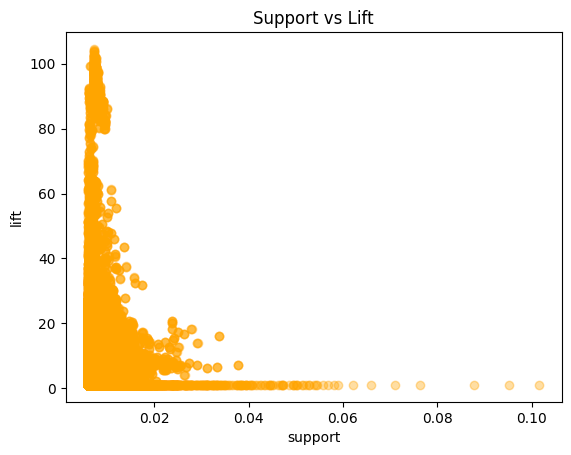

In [12]:
plt.scatter(rules['support'], rules['lift'], alpha=0.2,color='orange')
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

## Install necessary things

In [13]:
%%capture
!sudo apt-get update --fix-missing

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

## Create spark session

In [18]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('fpgrowth') \
    .getOrCreate()

spark   

## Create spark dataframe

In [24]:
from google.colab import files
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas

sparkdata = spark.createDataFrame(data)
basketdata = sparkdata.dropDuplicates(['BillNo', 'Itemname']).sort('BillNo')
basketdata = basketdata.groupBy("BillNo").agg(F.collect_list("Itemname")).sort('BillNo')

TypeError: ignored

## FP-Growth Algorithm

In [ ]:
#Frequent Pattern Growth – FP Growth is a method of mining frequent itemsets
fpGrowth = FPGrowth(itemsCol="collect_list(Itemname)", minSupport=0.006, minConfidence=0.006) 
model = fpGrowth.fit(basketdata)

# Display frequent itemsets.
items = model.freqItemsets
# Display generated association rules.
rules = model.associationRules
# transform examines the input items against all the association rules and summarize the
# consequents as prediction
transformed = model.transform(basketdata)

## Ouputs

### Output result

In [ ]:
# Convert the Spark DataFrame back to a Pandas DataFrame using Arrow
result_pdf = items.select("*").toPandas()
result_pdf.head()

In [ ]:
result_pdf.to_excel('result_pdfItemsFreq.xlsx')

### Output Rules

In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

In [ ]:
rules_pdf.to_excel('rules_pdfAnteConseConfLift.xlsx')

### Ouput Predictions

In [ ]:
transformed_pdf = transformed.select("*").toPandas()
transformed_pdf.head()

In [ ]:
transformed_pdf.to_excel('transformed_pdfSalesTransactionIDCollectListPred.xlsx')

# Conclusion
The higher the minimum support the lower that items get matched
The higher the minimum confidence the lower that the rules get applied
